 ## Introdution to Bayesian Optimization
 
 Bayesian Optimization is also called as Sequential Model Bayesian Optimization. This builds the *Probability Model of the **Objective Function that maps input values to probability loss:** p (loss | input values) *
* The probability model is easier to optimise than the objective function.
* The concept is to limit evals of the objective function by spending more time choosing the next values to try.

 
 **BayesOpt** is a library with state-of-the-art Bayesian optimization methods to solve nonlinear optimization, stochastic bandits or sequential experimental design problems
 
 * Bayesian Optimization is a special case of nonlinear optimization where the algorithm decides which point to explore next based on the analysis of a distribution over functions P(f), for example a Gaussian process or other surrogate model.
 * Each observation improves the knowledge of the function in all the input space.
 * It requires a lower number of iterations.
 * updating the posterior distribution and maximizing the acquisition function increases the cost per sample.
 * Normally used to optimize expensive target functions f(·),
 * Bayesian model-based optimization is intuitive: choose the next input values to evaluate based on the past results to concentrate the search on more promising values.
 * The end outcome is a reduction in the total number of search iterations compared to uninformed random or grid search methods
 
 The Gaussian process (GP) is a convenient and powerful prior distribution on functions, which we
will take here to be of the form f : X → R. T
 
 
 References:
 
* https://github.com/fmfn/BayesianOptimization
 
* https://arxiv.org/pdf/1012.2599v1.pdf

** This is a constrained optimization technique, therefore we need to specify the bounds the parameters of the function that we need to optimize. **
<br>
Input to the function:
<br>
`f`: The function to be optimized<br>
`pbounds` : is a dictionary used to specify the boundary of the params

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization


In [2]:
def OptimizetheFunction(func,pbounds):
    bo = BayesianOptimization(f = func,
                                  pbounds = pbounds,
                                  verbose = 2,#minimization verbose 1:max, 0:silent
                                  random_state = 1
                                  )
    bo.maximize(n_iter = 10)
    print("Maximum:",bo.max,"\n")
    for i, res in enumerate(bo.res):
        print("Iteration {}: \n\t{}\n".format(i, res))
        
#     bo.set_bounds(new_bounds={"x": (-2, 3)})
#     bo.maximize(n_iter = 3)

*** Let's make use of the Black box function to have a better understanding***

*Consider the given blackboxfunction:*
$$f(x) = e^{-(x - 2)^2} + e^{-\frac{(x - 6)^2}{10}} + \frac{1}{x^{-2} + 1} + \frac{1}{1+e^{-2}}, $$

In [3]:
def blackboxfunction(x):
    '''Kindly note that this a reference
    function that we need to optimize. '''
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**(-2) + 1) + 1/(1+np.exp(-2))


[[-2.        ]
 [-1.99879988]
 [-1.99759976]
 ...
 [ 9.99759976]
 [ 9.99879988]
 [10.        ]]


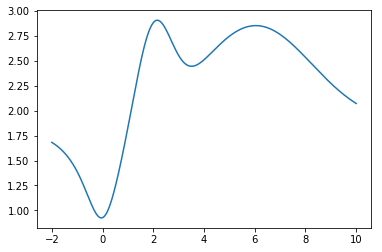

In [4]:
x = np.linspace(-2, 10, 10000).reshape(-1, 1)

y = blackboxfunction(x)
print(x)
plt.plot(x, y)
plt.show()

In [5]:
# Bounded region of parameter space
pbounds = {'x': (-2, 10)}
print("Finding the maximum value of the blackboxfuntion:")
OptimizetheFunction(blackboxfunction,pbounds)

Finding the maximum value of the blackboxfuntion:
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  2.553    |  3.004    |
|  2        |  2.818    |  6.644    |
|  3        |  1.682    | -1.999    |
|  4        |  2.625    |  1.628    |
|  5        |  0.9618   | -0.2389   |
|  6        |  2.319    |  8.821    |
|  7        |  2.749    |  5.008    |
|  8        |  2.073    |  10.0     |
|  9        |  2.645    |  7.569    |
|  10       |  2.848    |  5.811    |
|  11       |  2.903    |  2.232    |
|  12       |  2.851    |  6.208    |
|  13       |  2.904    |  2.095    |
|  14       |  2.908    |  2.16     |
|  15       |  2.908    |  2.16     |
Maximum: {'target': 2.9078976225897213, 'params': {'x': 2.1599713103670783}} 

Iteration 0: 
	{'target': 2.553411712862416, 'params': {'x': 3.0042640564308876}}

Iteration 1: 
	{'target': 2.8180321979042997, 'params': {'x': 6.643893921305898}}

Iteration 2: 
	{'target': 1.6822426359793516, 'params': {'x

### Let's try one more function:

*Consider the given objective1 function:*
$$f(x) = \sin(x) + \sin \left(\frac{10}{3}x \right)$$

In [7]:
def objective1(x):
    out = np.sin(x) + np.sin((10/3)*x)
    return out

[[2.7       ]
 [2.70048005]
 [2.7009601 ]
 ...
 [7.4990399 ]
 [7.49951995]
 [7.5       ]]


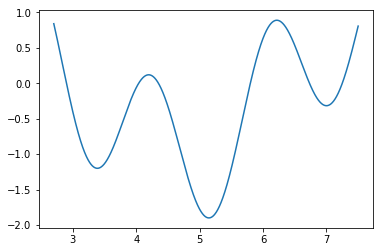

In [8]:

x = np.linspace(2.7, 7.5, 10000).reshape(-1, 1)
y = objective1(x)
print(x)
plt.plot(x, y)
plt.show()


In [9]:
# Bounded region of parameter space
pbounds = {'x': (2.7, 7.5)}
print("Finding the maximum value of the objective1:")
OptimizetheFunction(objective1,pbounds)

Finding the maximum value of the objective1:
|   iter    |  target   |     x     |
-------------------------------------
|  1        | -0.9643   |  4.702    |
|  2        |  0.8692   |  6.158    |
|  3        |  0.8373   |  2.701    |
|  4        |  0.1088   |  4.151    |
|  5        | -1.198    |  3.404    |
|  6        |  0.8692   |  6.158    |
|  7        |  0.7914   |  6.357    |
|  8        | -0.2584   |  7.107    |
|  9        | -0.6864   |  5.631    |
|  10       |  0.8056   |  7.5      |
|  11       |  0.1192   |  6.678    |
|  12       | -0.09039  |  2.922    |
|  13       |  0.6308   |  5.999    |
|  14       |  0.8835   |  6.248    |
|  15       |  0.8879   |  6.209    |
Maximum: {'target': 0.8879274676286978, 'params': {'x': 6.208745676804479}} 

Iteration 0: 
	{'target': -0.9643392670548345, 'params': {'x': 4.701705622572355}}

Iteration 1: 
	{'target': 0.8692118065224982, 'params': {'x': 6.157557568522359}}

Iteration 2: 
	{'target': 0.8373339114257847, 'params': {'x': 2.